In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-31/'
materials =  pd.read_csv(url + 'brewing_materials.csv')
beertax =  pd.read_csv(url + 'beer_taxed.csv')
brewsize =  pd.read_csv(url + 'brewer_size.csv')
states =  pd.read_csv(url + 'beer_states.csv')

In [ ]:
materials.to_csv('brewing_materials.csv')
beertax.to_csv('beer_taxed.csv')
brewsize.to_csv('brewer_size.csv')
states.to_csv('beer_states.csv')

# brewing_materials.csv

- data_type: Pounds of Material - this is a sub-table from beer_taxed
- material_type: Grain product, Totals, Non-Grain Product (basically hops vs grains)
- type: Actual line-item from material type
- month_current: Current number of barrels for this year/month
- month_prior_year: Prior year number of barrels for same month
- ytd_current: Cumulative year to date of current year
- ytd_prior_year: Cumulative year to date for prior year

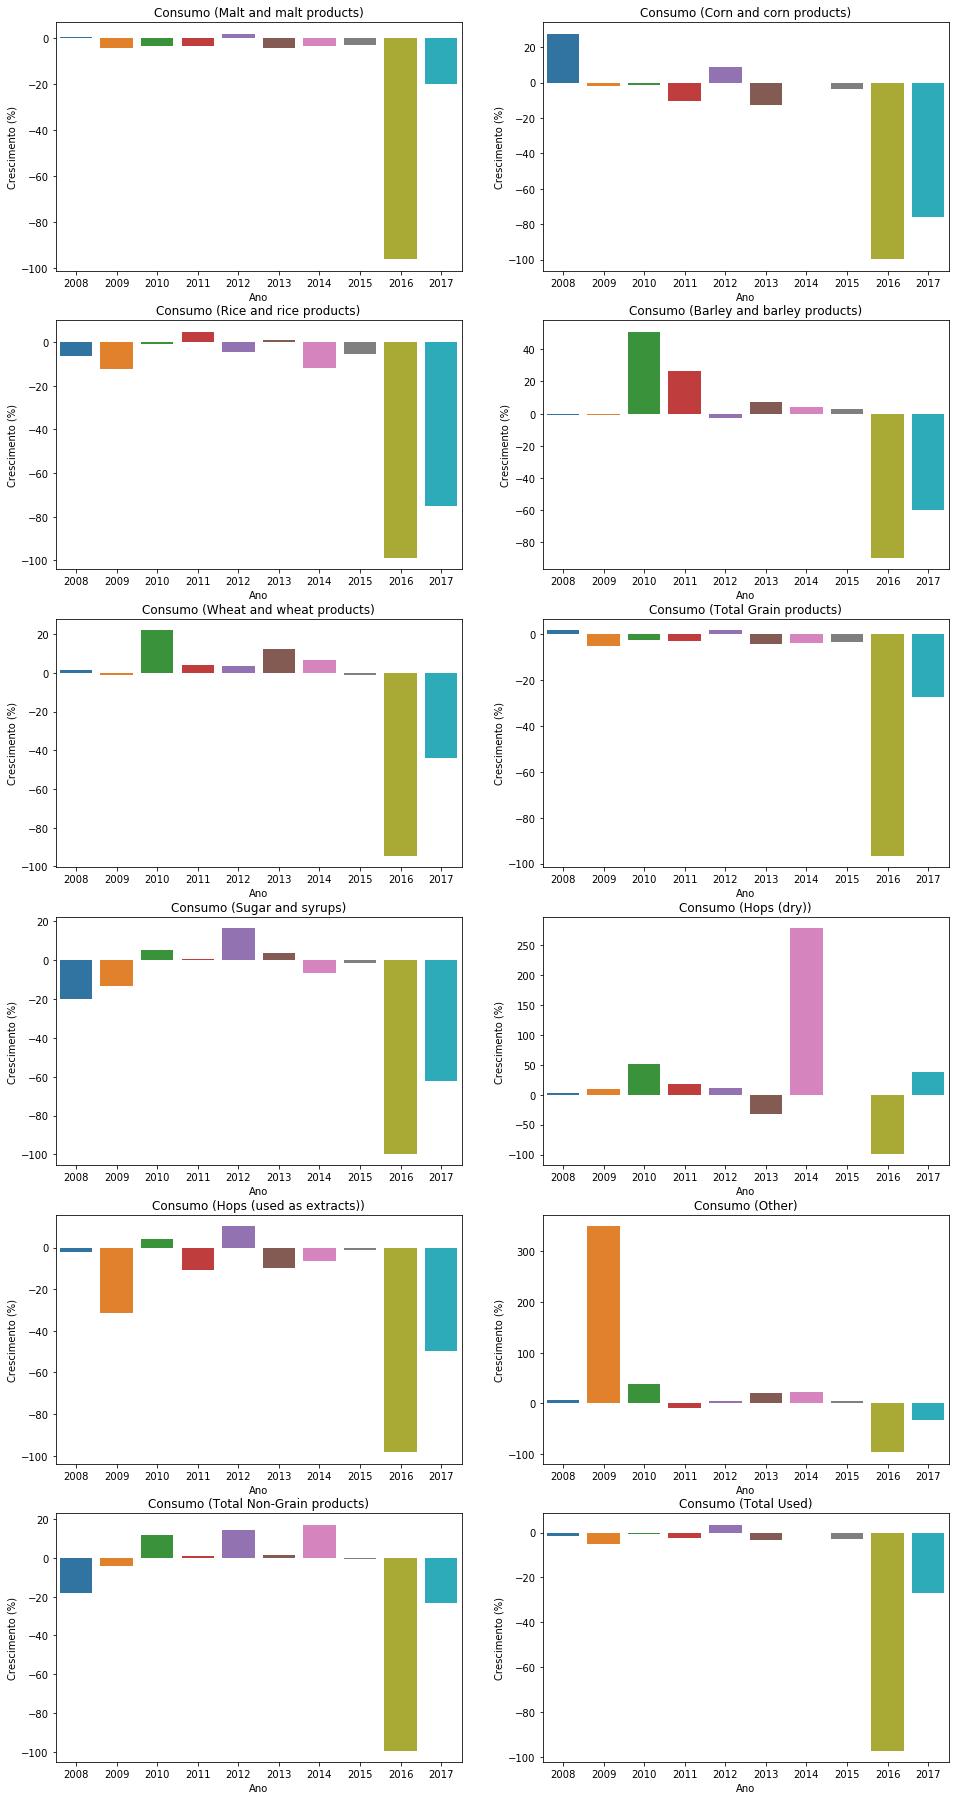

In [592]:
def group_by_type(by_type, df1=materials):
    '''
    Essa função seleciona um tipo de material do materials e retorna um groupby deles,
    junto com o um "delta", que representa a variação anual em %
    '''

    df2 = materials.groupby(by=['year','type','month']).sum().reset_index()
    mask = (df2.type == by_type)
    df2 = df2.loc[mask].groupby(by='year').sum()
    df2['delta'] = (df2.month_current_year - df2.month_prior_year)/df2.month_prior_year *100
    for year in [2015,2016,2017]: 
        cur = df2.loc[year].month_current_year
        prev = df2.loc[year-1].month_current_year
        df2.loc[year,'delta'] = (cur-prev)/prev *100
    
    return df2.reset_index()

# ---------------------------------------------------------#

# Importar dados
materials.to_csv('brewing_materials.csv')

# Gerar figura
fig, axes = plt.subplots(nrows=6, ncols=2,figsize=(16,32))


# Escolher eixo Y
y = 'delta'

# Escolher materiais
tipos = materials.type.unique()

eixos = [j for i in axes for j in i]
i=0

# gerar gráficos
for tipo in tipos:
    plt.sca(eixos[i])
    sns.barplot(data=group_by_type(tipo), x='year', y=y)
    plt.title('Consumo ('+tipo + ')')
    plt.ylabel('Crescimento (%)')
    plt.xlabel('Ano')
    i+=1

plt.show()

fig.savefig("Materials consumption.png")

# beertax

- data_type > Barrels Produced
- tax_status > The Tax Status, factor with Totals, Taxable, Sub Total Taxable, Tax Free, Sub Total Tax-Free
- type > Type of production, either Total Production (Production) or specific sub-category and sub-totals
- month_current > Current number of barrels for this year/month
- month_prior_year >	Prior year number of barrels for same month
- ytd_current > Cumulative year to date of current year
- ytd_prior_year > Cumulative year to date for prior year

In [56]:
#      $7/$18 per barrel
#      $3.50/$16 per barrel

# converting as 7/18 and 3.5/16

In [60]:
beertax.tax_rate = beertax.tax_rate.apply(lambda x: 7/18*100 if x.startswith('$7/$18') else 3.5/16*100)

In [64]:
beertax.loc[(beertax.tax_status == 'Tax Free')]

,data_type,tax_status,year,month,type,month_current,month_prior_year,ytd_current,ytd_prior_year,tax_rate
5,Barrels Produced,Tax Free,2008,1,For export,262985,268473,262985.0,268473.0,38.888889
6,Barrels Produced,Tax Free,2008,1,For vessels and aircraft,0,0,0.0,0.0,38.888889
7,Barrels Produced,Tax Free,2008,1,Consumed on brewery premises,708,885,708.0,885.0,38.888889
16,Barrels Produced,Tax Free,2008,2,For export,286593,266301,550005.0,534774.0,38.888889
17,Barrels Produced,Tax Free,2008,2,For vessels and aircraft,0,0,0.0,0.0,38.888889
...,...,...,...,...,...,...,...,...,...,...
1564,Barrels Produced,Tax Free,2019,11,For vessels and aircraft,0,9,34439.0,2631.0,21.875000
1565,Barrels Produced,Tax Free,2019,11,Consumed on brewery premises,752,1041,90413.0,93023.0,21.875000
1574,Barrels Produced,Tax Free,2019,12,For export,361068,359305,5066859.0,6909496.0,21.875000
1575,Barrels Produced,Tax Free,2019,12,For vessels and aircraft,1,2,34440.0,2633.0,21.875000


# brewsize

- brewer_size > Range of production for brewer size, number of barrels produced
- n_of_brewers > Number of brewers at that brewer size
- total_barrels > Total barrels of beer produced at that brewer size
- taxable_removals > Taxable barrels for removals - removals for consumption under taxation
- total_shipped > Total barrels shipped - produced beer that is not taxed

In [5]:
brewsize.head(2)

,year,brewer_size,n_of_brewers,total_barrels,taxable_removals,total_shipped
0,2009,"6,000,001 Barrels and Over",18,1.712329e+08,1.596440e+08,3639970.0
1,2009,"1,000,001 to 6,000,000 Barrels",4,9.970404e+06,9.592723e+06,14548.0


# States

- staten > State abbreviated
- barrels > Barrels produced within each type
- type > Type of production/use (On premise, Bottles/Cans, Kegs/Barrels)

In [94]:
import numpy as np
np.log10(10)

1.0

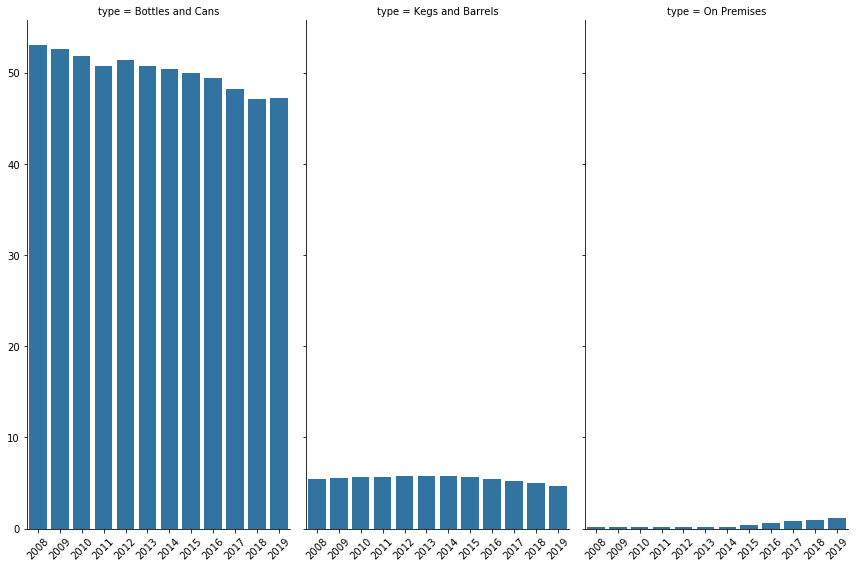

In [85]:
g = sns.FacetGrid(data.reset_index(), col="type", height=8, aspect=0.5)
g.map(sns.barplot, "year", "litters(billions)");
g.map(plt.xticks, rotation=45, color='black')

In [64]:
data = states.copy()
data.barrels = data.barrels.apply(lambda x: x*158.987/10**9)
data.columns = ['state', 'year', 'litters(billions)', 'type']
data = data.groupby(by=['type','year']).sum()

bcans = data.loc['Bottles and Cans'].reset_index()
kegs = data.loc['Kegs and Barrels'].reset_index()
prem = data.loc['On Premises'].reset_index()

TypeError: sca() got an unexpected keyword argument 'sharey'

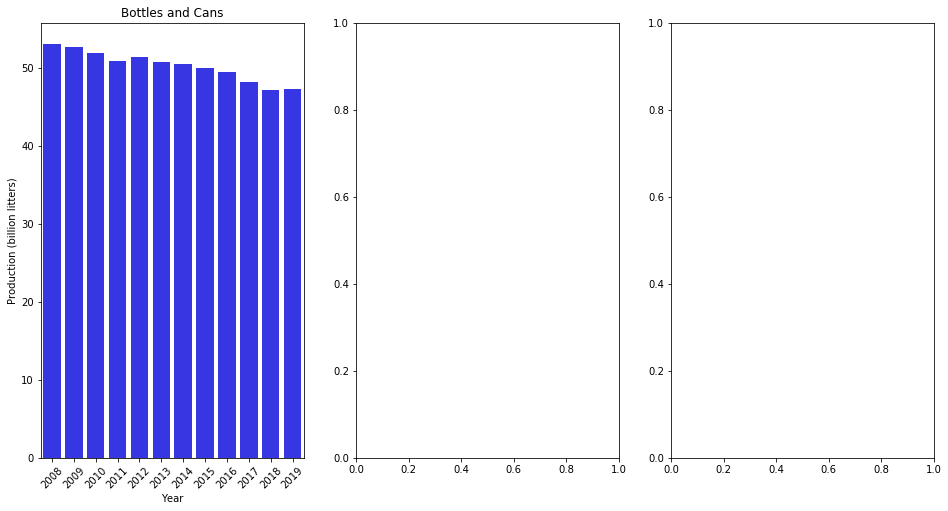

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,8))

alpha=0.9

plt.sca(axes[0])
sns.barplot(data=bcans, x='year', y='litters(billions)', color='blue', alpha=alpha)
plt.title('Bottles and Cans')
plt.ylabel('Production (billion litters)')
plt.xlabel('Year')
plt.xticks(rotation=45)

plt.sca(axes[1])
sns.barplot(data=kegs, x='year', y='litters(billions)', color='red', alpha=alpha)
plt.title('Kegs and Barrels')
plt.ylabel('Production (billion litters)')
plt.xlabel('Year')
plt.xticks(rotation=45)

plt.sca(axes[2])
sns.barplot(data=prem, x='year', y='litters(billions)', color='green', alpha=alpha)
plt.title('on premises')
plt.ylabel('Production (billion litters)')
plt.xlabel('Year')
plt.xticks(rotation=45)

plt.show()


In [5]:
df = states.loc[(states.year==2008) | (states.year==2019)]
my_list = list(df.barrels)
diff = []

for i in range(len(list(df.barrels))):
    if i == 0:
        diff.append(0)
    else:
        diff.append((my_list[i]-my_list[i-1])/my_list[i-1]*100)
        
bob = pd.DataFrame({'diff':diff})

df = df.reset_index(drop=True)
states_productions = pd.concat([df,bob],axis=1).loc[:,['state','type','diff']]

#get elements by uneven index
states_productions = states_productions.loc[[i+1 for i in range(0,312,2)]]

#rename columns
states_productions.columns = ['state', 'type', 'decade growth']

In [587]:
states_productions.to_csv('states_productions.csv')

# TABLEAU

BEER PRODUCTION:
https://public.tableau.com/profile/victor.farneze.de.camargo#!/vizhome/BeerProductionUnitedStates/Dashboard1?publish=yes

BEER PRODUCTION 2

https://public.tableau.com/profile/victor.farneze.de.camargo#!/vizhome/BeerProductionUnitedStatesoverdecade/Dash-DecadeProduction?publish=yes